## Prepare the data and packages

In [1]:
from PIL import Image
import requests
from io import BytesIO
from matplotlib.pyplot import imshow
from matplotlib import pyplot as plt
import numpy as np
from math import sqrt,log, floor,ceil
from cake_cutting import MatrixShape, arrangement_algorithm
import logging
# logging.basicConfig(level=logging.DEBUG)

In [2]:
test_image_url = "https://vthumb.ykimg.com/054101015E58B7508B6C06A140CBEC0D"
with BytesIO(requests.get(test_image_url).content) as fp:
    im = Image.open(fp)
    im.load()

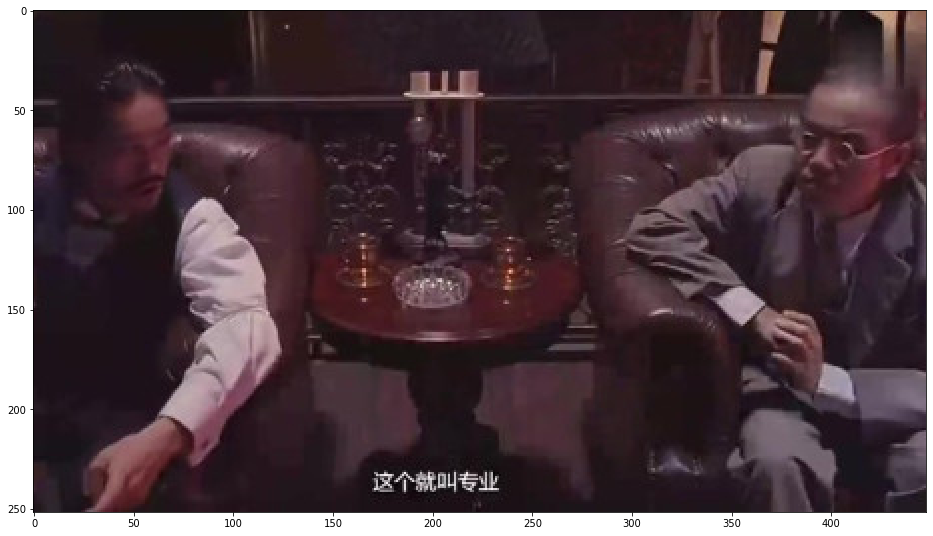

In [3]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [16,16]
imshow(np.asarray(im))

## Reshape the image and generate the input data

In [4]:
rescale_factor = sqrt(0.5)
min_size = 20
refactor_count = floor(min(
    log(min_size*1.0/im.width,rescale_factor),
    log(min_size*1.0/im.height,rescale_factor),
))
images = {
    f"im-{i}":np.array(im.resize(size=(
        int(im.width*(rescale_factor**i)),
        int(im.height*(rescale_factor**i)),
    )))
    for i in range(refactor_count)
}
im_shapes = {
    mat_id:MatrixShape(*im.shape[:2])
    for mat_id, im in images.items()
}
padding_size = MatrixShape(10, 10)
container_size = MatrixShape(120, 120)
cake_containers = arrangement_algorithm(
    matrixes=im_shapes,
    container_size=container_size,
    padding_size=padding_size
)

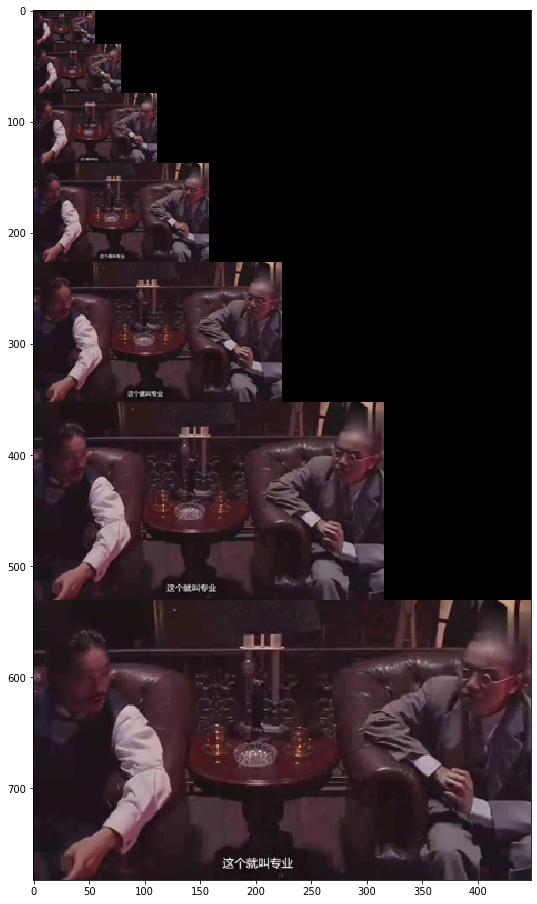

In [5]:
image_pyramid_display = np.zeros(
    (
        sum(v.shape[0] for _,v in images.items()),
        max(v.shape[1] for _,v in images.items()),
        3
    ),dtype="uint8"
)
start_index = 0
for imid, im in sorted(images.items(),key=lambda x:x[1].shape[1]):
    h,w,c = im.shape
    image_pyramid_display[start_index:start_index+h,0:w,:] = im
    start_index += h
plt.rcParams["figure.figsize"] = [20,16]
imshow(image_pyramid_display)

## Generate the containers by mapping

In [6]:
container_ims = {}
for container_id, cake_container in enumerate(cake_containers):
    container_im = np.zeros((cake_container.container_size.width,cake_container.container_size.height,3),dtype='uint8')
    for piece in cake_container.pieces:
        
        container_location = piece.container_loc
        original_location = piece.original_loc
        container_im[
            container_location.left:container_location.left + container_location.width,
            container_location.top:container_location.top + container_location.height,
            :
        ] = images[piece.original_id][
            original_location.left:original_location.left + original_location.width,
            original_location.top:original_location.top + original_location.height,
            :
        ]
    container_ims[container_id] = container_im

## Visualize all the containers

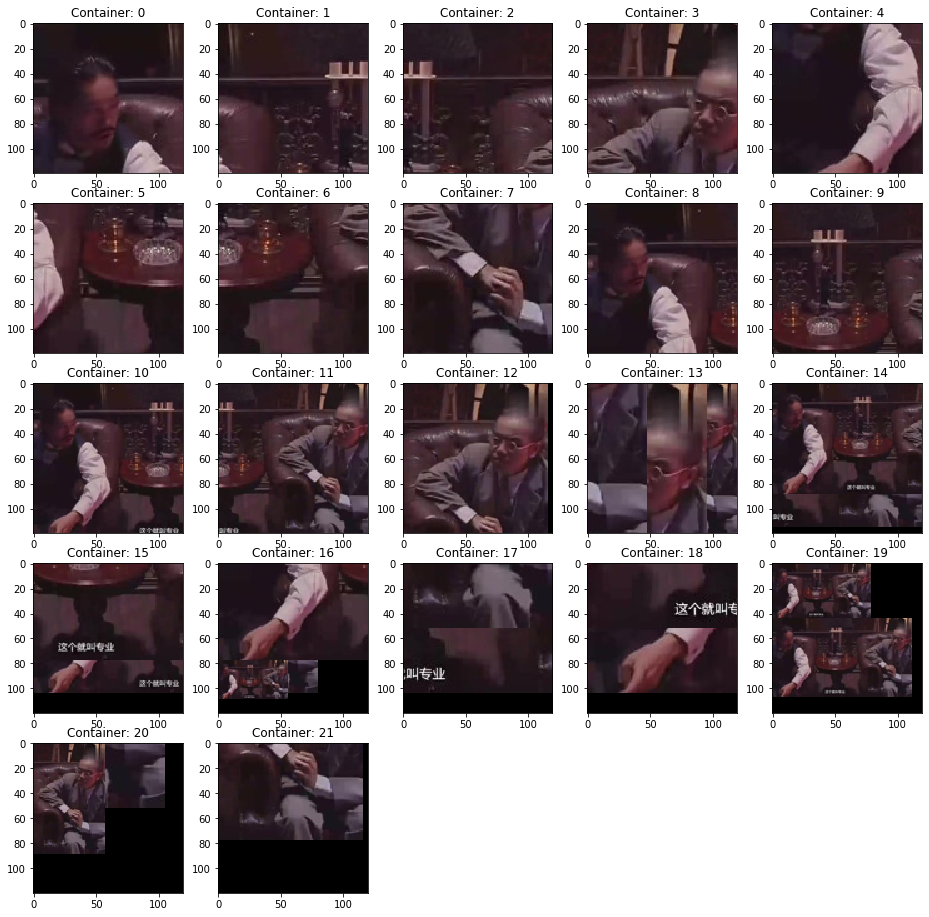

In [7]:

w=120
h=120
columns = ceil(sqrt(len(container_ims)*1.0))
rows = ceil(len(container_ims)*1.0/columns)
fig=plt.figure(figsize=(16, 16))
for i,(im_id,im_arr) in enumerate(container_ims.items()):
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(im_arr)
    plt.title(f"Container: {im_id}")
plt.show()